In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
restaurants_df = pd.read_csv('output/responses/batch1-2_restaurants_dataset.csv')

In [4]:
restaurants_df.shape

(2783, 17)

In [5]:
restaurants = restaurants_df.copy()

In [6]:
reviews_df = pd.read_csv('output/responses/batch1-2_reviews_dataset.csv')

In [7]:
reviews_df.shape

(1183701, 16)

In [7]:
reviews = reviews_df.copy()

# Data Cleaning

## Drop unnnecessary columns

In [8]:
restaurants = restaurants.drop(columns=['Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'])

In [9]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   place_id       2783 non-null   object 
 1   name           2783 non-null   object 
 2   reviews        2783 non-null   int64  
 3   main_category  2729 non-null   object 
 4   categories     2729 non-null   object 
 5   main_rating    2783 non-null   float64
 6   address        2739 non-null   object 
 7   link           2783 non-null   object 
 8   review_photos  2783 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 195.8+ KB


In [10]:
restaurants.shape

(2783, 9)

## Fill NaN values

In [11]:
restaurants.isnull().sum()

place_id          0
name              0
reviews           0
main_category    54
categories       54
main_rating       0
address          44
link              0
review_photos     0
dtype: int64

In [12]:
restaurants.fillna({'address': 'Singapore'}, inplace=True)

In [13]:
restaurants.fillna({'main_category': 'Unknown'}, inplace=True)

In [14]:
restaurants.fillna({'categories': "['Unknown']"}, inplace=True)

In [15]:
restaurants.isnull().sum()

place_id         0
name             0
reviews          0
main_category    0
categories       0
main_rating      0
address          0
link             0
review_photos    0
dtype: int64

## Drop any duplicates

In [16]:
restaurants.drop_duplicates(inplace=True)

In [17]:
restaurants.shape

(2386, 9)

In [18]:
restaurants[restaurants.duplicated(keep=False)]

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos


In [19]:
restaurants[restaurants.duplicated(subset=['place_id', 'name', 'reviews', 'address'])]

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos
30,ChIJ3xYfCeAX2jERKAmAmjJ8oqU,57° Mala Xiang Guo @Ang Mo Kio,141,Restaurant,['Restaurant'],4.1,"4190 Ang Mo Kio Ave 6, #01-05 & #01-06 Broadwa...",https://www.google.com/maps/place/57%C2%B0+Mal...,['https://lh5.googleusercontent.com/p/AF1QipNf...
32,ChIJHxxkwXgZ2jERNAV3RV7e7co,57° Mala Xiang Guo @Shaw Plaza,106,Restaurant,['Restaurant'],4.3,"360 Balestier Rd, #02-20/21 Shaw Plaza, Singap...",https://www.google.com/maps/place/57%C2%B0+Mal...,['https://lh5.googleusercontent.com/p/AF1QipPJ...
34,ChIJJfttivEX2jERR5G6vyX9QrU,57˚ Mala Xiang Guo @Paya Lebar,78,Chinese restaurant,['Chinese restaurant'],3.8,"329 Upper Paya Lebar Rd, Singapore 534948",https://www.google.com/maps/place/57%CB%9A+Mal...,['https://lh5.googleusercontent.com/p/AF1QipMk...
66,ChIJHU61llYZ2jERmh0bexkGiJk,A-Mor Turkish Kebab (695 North bridge rd),304,Takeaways,['Takeaways'],4.4,"695 North Bridge Rd, Singapore 198674",https://www.google.com/maps/place/A-Mor+Turkis...,['https://lh5.googleusercontent.com/p/AF1QipOr...
190,ChIJaVJl-msZ2jERXPBXaaRx1Bk,A2B Veg Restaurant (Adyar Ananda Bhavan),1363,Indian restaurant,"['Indian restaurant', 'Indian sweets shop', 'I...",3.8,"276-278 Serangoon Rd, Singapore 218105",https://www.google.com/maps/place/A2B+Veg+Rest...,['https://lh5.googleusercontent.com/p/AF1QipOU...
...,...,...,...,...,...,...,...,...,...
2752,ChIJG0xEFbIZ2jER95y7R-Z8JJs,Hopscotch (Capitol),1491,Restaurant,['Restaurant'],4.6,"15 Stamford Rd, #01-83 Arcade @ The Capitol Ke...",https://www.google.com/maps/place/Hopscotch+(C...,['https://lh5.googleusercontent.com/p/AF1QipOT...
2760,ChIJG0v_dVAZ2jERyoS6xFfB1_w,Beirut Express (Shenton),144,Fast food restaurant,"['Fast food restaurant', 'Greek restaurant', '...",3.9,"1 Shenton Wy, #01-06, Singapore 068803",https://www.google.com/maps/place/Beirut+Expre...,['https://lh5.googleusercontent.com/p/AF1QipOH...
2763,ChIJJR9auHAZ2jER8enAJuyfCyQ,House of Peranakan Petit,317,Nyonya restaurant,"['Nyonya restaurant', 'Asian restaurant', 'Res...",4.2,"42 Eng Hoon St, Estate 169785",https://www.google.com/maps/place/House+of+Per...,['https://lh5.googleusercontent.com/p/AF1QipNE...
2765,ChIJdwjQ2tQZ2jERFYU-5f1aW2g,Hoàng Hâu - Vietnamese Restaurant,239,Vietnamese restaurant,['Vietnamese restaurant'],4.6,"146 01, 1090 Jalan Bukit Merah, Block 146, 160146",https://www.google.com/maps/place/Ho%C3%A0ng+H...,['https://lh5.googleusercontent.com/p/AF1QipMC...


In [20]:
restaurants = restaurants.drop_duplicates(subset=['place_id', 'name', 'reviews', 'address'])

In [21]:
restaurants.shape

(2240, 9)

## Remove non-dining establishments

In [22]:
main_categories = list(restaurants['main_category'])
main_categories = list(set(main_categories))
main_categories.sort()

In [23]:
main_categories

['Advertising agency',
 'Air conditioning store',
 'American restaurant',
 'Argentinian restaurant',
 'Art cafe',
 'Art museum',
 'Art studio',
 'Asian fusion restaurant',
 'Asian restaurant',
 'Association / Organization',
 'Authentic Japanese restaurant',
 'Açaí shop',
 'Bakery',
 'Bar',
 'Bar & grill',
 'Barbecue restaurant',
 'Beauty salon',
 'Bed & breakfast',
 'Bicycle club',
 'Bistro',
 'Boutique',
 'Branding agency',
 'Brazilian restaurant',
 'Bubble tea store',
 'Buffet restaurant',
 'Burmese restaurant',
 'Bus Interchange',
 'Bus depot',
 'Bus stop',
 'Business center',
 'Business management consultant',
 'Butcher shop deli',
 'Cafe',
 'Cake shop',
 'Candle store',
 'Cantonese restaurant',
 'Car dealer',
 'Car wash',
 'Catalonian restaurant',
 'Caterer',
 'Catering food and drink supplier',
 'Cha chaan teng (Hong Kong-style cafe)',
 'Chettinad restaurant',
 'Chicken restaurant',
 "Children's clothing store",
 'Chinese Takeaway',
 'Chinese language school',
 'Chinese noodle re

In [25]:
len(main_categories)

185

In [27]:
cats_to_remove = ['Advertising agency',
 'Air conditioning store',
 'Art museum',
 'Art studio',
 'Association / Organization',
 'Açaí shop',
 'Bakery',
 'Beauty salon',
 'Bed & breakfast',
 'Bicycle club',
 'Boutique',
 'Branding agency',
 'Business center',
 'Business management consultant',
 'Candle store',
 'Car dealer',
 'Car wash',
 'Caterer',
 'Catering food and drink supplier',
 "Children's clothing store",
 'Chinese Takeaway',
 'Chinese language school',
 'Clothing store',
 'Coaching center',
 'Coffee store',
 'Coffee wholesaler',
 'Computer support and services',
 'Condominium complex',
 'Confectionery store',
 'Consultant',
 'Corporate office',
 'Coworking space',
 'Curtain and upholstery cleaning service',
 'Dance school',
 'Delivery Restaurant',
 'Department store',
 'Design agency',
 'Designer Clothing Shop',
 'Diving center',
 'E-commerce service',
 'Education center',
 'Employment center',
 'Event management company',
 'Event venue',
 'Fish store',
 'Florist',
 'Flower delivery',
 'Food court',
 'Food manufacturer',
 'Food producer',
 'Food products supplier',
 'Freight forwarding service',
 'Fruit wholesaler',
 'Gift shop',
 'Gourmet grocery store',
 'Grocery store',
 'Gym and Fitness Centre',
 'Hawker Stall',
 'Hawker center',
 'Health and beauty shop',
 'Health food store',
 'Hematologist',
 'Holding company',
 'Hotel',
 'Housing development',
 'Ice cream shop',
 'Importer',
 'Indoor golf course',
 'Industrial Real Estate Agency',
 'Industrial equipment supplier',
 'Information services',
 'Interior designer',
 'Italian grocery store',
 'Japanese confectionery shop',
 'Japanese grocery store',
 'Jeweler',
 'Jewelry store',
 'Laboratory equipment supplier',
 'Law firm',
 'Live music venue',
 'Lodging',
 'Lottery retailer',
 'MRT/LRT Station',
 'Market',
 'Marketing agency',
 'Marketing consultant',
 'Maternity store',
 'Media company',
 'Medical equipment supplier',
 'Memorial park',
 'Monument maker',
 'Motorcycle rental agency',
 'Movie rental store',
 'Moving and storage service',
 'Music producer',
 'Music school',
 'Nail salon',
 'Park',
 'Parking lot',
 'Pastry shop',
 'Performing arts group',
 'Pet Shop',
 'Photography service',
 'Plastic products supplier',
 'Police station',
 'Property management company',
 'Publisher',
 'Real estate agency',
 'Real estate agent',
 'Real estate consultant',
 'Recording studio',
 'Religious organization',
 'Restaurant supply store',
 'Serviced accommodation',
 'Shipping and mailing service',
 'Shop',
 'Shopping mall',
 'Souvenir store',
 'Supermarket',
 'Tattoo and piercing shop',
 'Tattoo shop',
 'Tea store',
 'Transportation service',
 'Tutoring service',
 'Unknown',
 'Used clothing store',
 'Video production service',
 'Waxing hair removal service',
 'Wedding venue',
 'Wellness center',
 'Wellness program',
 'Wine cellar',
 "Women's clothing store"]

In [28]:
cats_to_remove = [cat.lower() for cat in cats_to_remove]
mask = restaurants['main_category'].str.lower().isin(cats_to_remove)
restaurants = restaurants[~mask]
restaurants.shape

(1737, 9)

# Basic Analysis

## Distribution of restaurants by ratings

### 🧑🏻‍🍳🧑🏻‍🍳 The average restaurant rating is 4.1; outliers range from rating of 0 to 3

In [29]:
restaurants['main_rating'].mean()

4.102014968336212

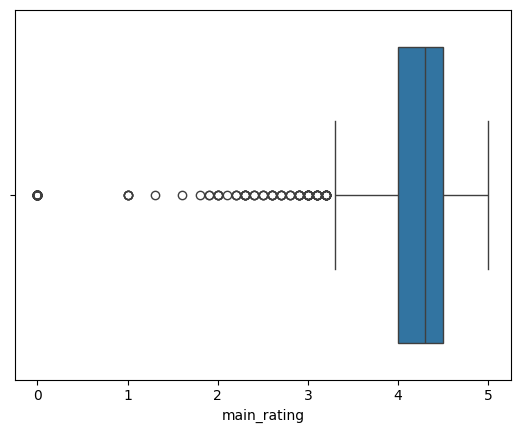

In [31]:
sns.boxplot(data=restaurants, x='main_rating');

### 🧑🏻‍🍳🧑🏻‍🍳 Majority of restaurants are rated 4.0 to 4.5

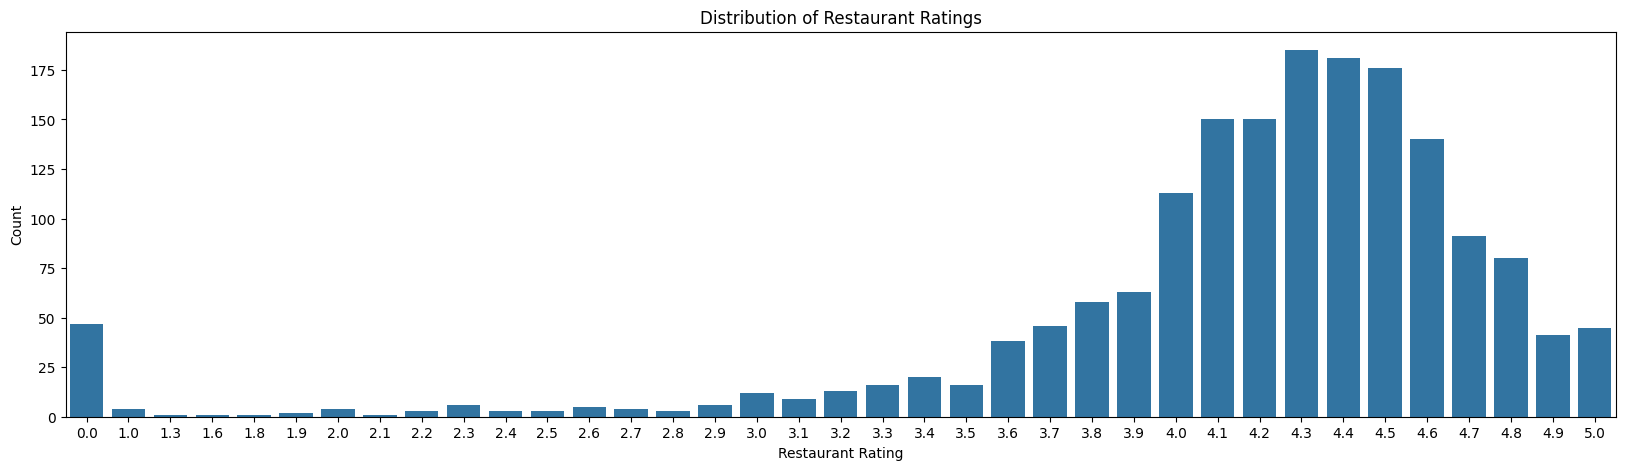

In [56]:
plt.figure(figsize=(20,5))
sns.countplot(data=restaurants, x='main_rating')
plt.xlabel('Restaurant Rating')
plt.ylabel('Count')
plt.title('Distribution of Restaurant Ratings')
plt.show()

In [99]:
restaurants[restaurants['main_category']=='Fast food restaurant']

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos
230,ChIJy1_1-7c92jER-t15yN56FXI,Antalya Eastpoint Singapore,242,Fast food restaurant,['Fast food restaurant'],4.8,"3 Simei Street 6, #01-03B Eastpoint Mall, Sing...",https://www.google.com/maps/place/Antalya+East...,['https://lh5.googleusercontent.com/p/AF1QipMw...
427,ChIJG0v_dVAZ2jERyoS6xFfB1_w,Beirut Express (Shenton),144,Fast food restaurant,"['Fast food restaurant', 'Greek restaurant', '...",3.9,"1 Shenton Wy, #01-06, Singapore 068803",https://www.google.com/maps/place/Beirut+Expre...,['https://lh5.googleusercontent.com/p/AF1QipOH...
708,ChIJlSAFBVYZ2jERBG1neH6iRGk,Ganh Xua (GX) Banh Mi - Joo Chiat,135,Fast food restaurant,['Fast food restaurant'],4.7,"2 Fowlie Rd, #01-13, Singapore 428505",https://www.google.com/maps/place/Ganh+Xua+%28...,['https://lh5.googleusercontent.com/p/AF1QipO6...
1101,ChIJeWigXMAb2jERNRgFP7PR_Zg,Penyet King,24,Fast food restaurant,['Fast food restaurant'],2.0,"1 HarbourFront Walk, Singapore 098585",https://www.google.com/maps/place/Penyet+King/...,['https://lh5.googleusercontent.com/p/AF1QipP5...
1119,ChIJgakLDysZ2jERS5rpBRajWrU,Chops! Grill & Sides (GR.ID Selegie),346,Fast food restaurant,['Fast food restaurant'],4.1,"1 Selegie Rd, #01-03 GR.ID Mall, Singapore 188306",https://www.google.com/maps/place/Chops!+Grill...,['https://lh5.googleusercontent.com/p/AF1QipPr...
1884,ChIJ7QPH6TIb2jER0BMAgU2I8CM,FOOD FOR A SOCIAL CAUSE @ EAT TALK (at Mediacorp),2,Fast food restaurant,['Fast food restaurant'],5.0,"1 Stars Ave, #04-01, Singapore 138507",https://www.google.com/maps/place/FOOD+FOR+A+S...,[]
2627,ChIJeThcUdkZ2jERAlXSv4MkC0g,bamboo bowls - Far East Square,163,Fast food restaurant,"['Fast food restaurant', 'Health food restaura...",4.1,"Far East Square, 137 Amoy St, #01-01 to 03, 04...",https://www.google.com/maps/place/bamboo+bowls...,['https://lh5.googleusercontent.com/p/AF1QipNV...
2740,ChIJHf2Lt6cb2jER-kMoE0mZ6vE,Hongdae Chicken,0,Fast food restaurant,['Fast food restaurant'],0.0,"19 Jln Kilang Barat, #03-01, Singapore 159361",https://www.google.com/maps/place/Hongdae+Chic...,[]


In [98]:
restaurants[restaurants['reviews']<10]

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos
1,ChIJuXEcL-gX2jEReUwbpfL8C4c,#01-22 Wufu Hakka Noodle,1,Noodle shop,['Noodle shop'],5.0,"590 Upper Thomson Rd, #01-22, Singapore 574419",https://www.google.com/maps/place/%2301-22+Wuf...,[]
2,ChIJebVvXAAZ2jERRlzs4R2Qsm4,116 PHỐ ĐÊM,3,Vietnamese restaurant,['Vietnamese restaurant'],5.0,"116 Mackenzie Rd, Singapore 228710",https://www.google.com/maps/place/116+PH%E1%BB...,['https://lh5.googleusercontent.com/p/AF1QipP1...
37,ChIJo1JAE8gX2jER31WPWpczzY8,68 Nonya Kueh,6,Nyonya restaurant,['Nyonya restaurant'],3.8,"530 Lor 6 Toa Payoh, #01-10B Bus Interchange, ...",https://www.google.com/maps/place/68+Nonya+Kue...,['https://lh5.googleusercontent.com/p/AF1QipN7...
42,ChIJryFE3j0X2jERcLoe63y7KKk,786 Indian Muslim Food,4,Restaurant,['Restaurant'],4.3,"11 Clover Wy, Singapore 579082",https://www.google.com/maps/place/786+Indian+M...,[]
43,ChIJ__-_nCwY2jERDM4e1v0rlp0,786 Fazil Muslim Food Stall,4,Restaurant,['Restaurant'],3.5,"69 Geylang Bahru, Singapore 330069",https://www.google.com/maps/place/786+Fazil+Mu...,['https://lh5.googleusercontent.com/p/AF1QipNW...
...,...,...,...,...,...,...,...,...,...
2740,ChIJHf2Lt6cb2jER-kMoE0mZ6vE,Hongdae Chicken,0,Fast food restaurant,['Fast food restaurant'],0.0,"19 Jln Kilang Barat, #03-01, Singapore 159361",https://www.google.com/maps/place/Hongdae+Chic...,[]
2742,ChIJ-QEcRwcZ2jERQ-GSXnmkzCQ,Seoul Bunsik @ Funan,4,Korean restaurant,['Korean restaurant'],4.8,"North Bridge Rd, #02-02 Funan 107, Singapore 1...",https://www.google.com/maps/place/Seoul+Bunsik...,['https://lh5.googleusercontent.com/p/AF1QipPc...
2772,ChIJ6-YzAysX2jERKmeXREbO7VM,Hualong Fishhead Steamboat,8,Chinese restaurant,['Chinese restaurant'],2.6,"Blk 631 Hougang Ave 8, #01-06, Singapore 530631",https://www.google.com/maps/place/Hualong+Fish...,['https://lh5.googleusercontent.com/p/AF1QipOW...
2774,ChIJ6Y9kApkb2jERVPmthHd725A,Hualong Fishhead Steamboat,3,Coffee shop,['Coffee shop'],4.3,40 Margaret Dr,https://www.google.com/maps/place/Hualong+Fish...,['https://lh5.googleusercontent.com/p/AF1QipNh...


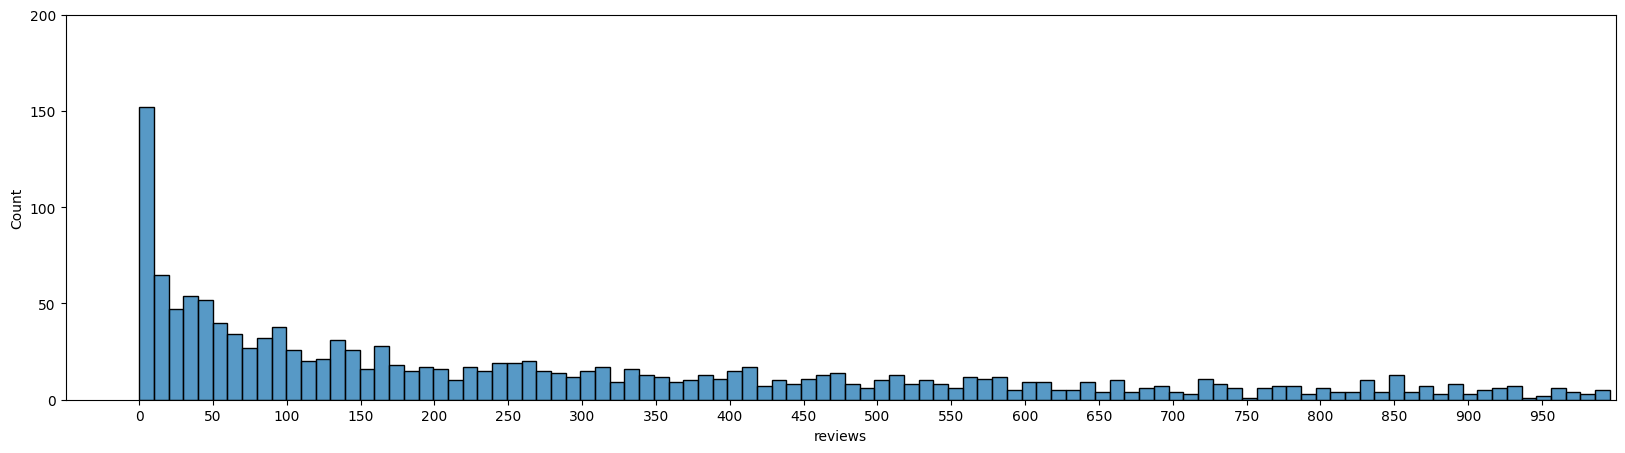

In [96]:
plt.figure(figsize=(20,5))
sns.histplot(data=restaurants[restaurants['reviews']<1000], x='reviews', bins=100)
plt.xticks(np.arange(0,1000,50))
plt.yticks(np.arange(0,600,50))
plt.xlim(right=1000)
plt.ylim(top=200);

### 🧑🏻‍🍳🧑🏻‍🍳 There are 573 restaurants rated 4.5 and above

In [45]:
top_rated = restaurants[restaurants['main_rating']>=4.5].sort_values(by='reviews', ascending=False)

In [46]:
top_rated.shape

(573, 9)

## Analysis of Reviews by Ratings

### 🧑🏻‍🍳🧑🏻‍🍳 First we should drop outliers in the number of reviews

In [47]:
restaurants_sans_outliers = restaurants[restaurants['reviews']<=1000] # 75th percentile is 772
restaurants_sans_outliers.describe()

,reviews,main_rating
count,1474.000000,1474.000000
mean,279.892809,4.053324
std,270.559586,0.912279
min,0.000000,0.000000
25%,49.000000,3.900000
50%,188.000000,4.300000
75%,454.750000,4.500000
max,996.000000,5.000000


### 🧑🏻‍🍳🧑🏻‍🍳 Ave number of reviews for restaurants rated >4 is significantly more

In [48]:
mean_reviews = restaurants_sans_outliers.groupby('main_rating')['reviews'].mean()
mean_reviews

main_rating
0.0      0.000000
1.0      1.750000
1.3      4.000000
1.6     14.000000
1.8     34.000000
1.9     38.000000
2.0     25.000000
2.1     35.000000
2.2     38.666667
2.3     43.500000
2.4     22.333333
2.5     40.000000
2.6     62.800000
2.7     45.250000
2.8     24.333333
2.9    153.000000
3.0     31.250000
3.1     73.000000
3.2     64.461538
3.3    138.375000
3.4    130.900000
3.5    131.375000
3.6    175.735294
3.7    236.133333
3.8    193.076923
3.9    292.885246
4.0    279.078431
4.1    344.456000
4.2    416.966667
4.3    367.875000
4.4    389.517241
4.5    322.577778
4.6    351.928571
4.7    303.756757
4.8    235.863636
4.9    123.764706
5.0     15.577778
Name: reviews, dtype: float64

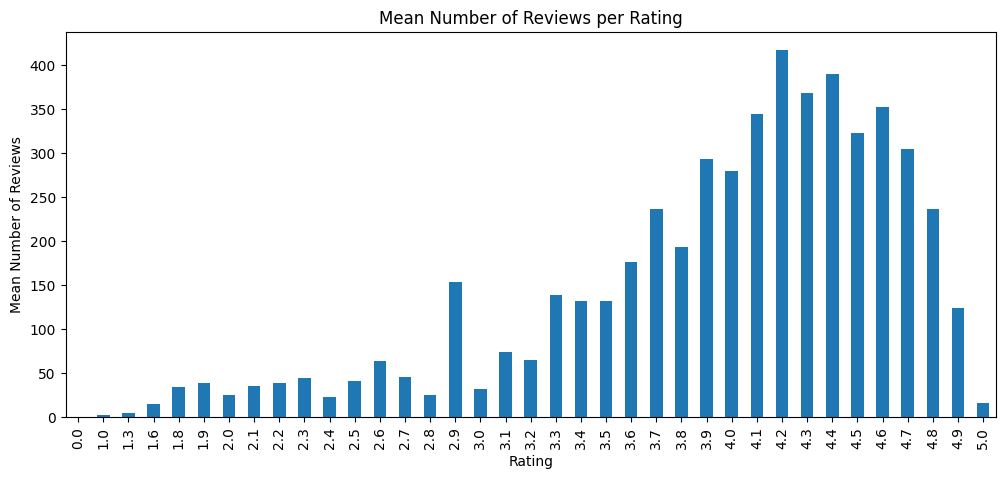

In [57]:
plt.figure(figsize=(12, 5))
mean_reviews.plot(kind='bar')
plt.title('Mean Number of Reviews per Rating')
plt.xlabel('Rating')
plt.ylabel('Mean Number of Reviews')
plt.xticks(rotation=90)
plt.show()

# Explore Categorical Data

## Distribution of Restaurant Categories

Restaurant Categories: Analyze the distribution of restaurant types (e.g., cuisine, price range).
Cross-tabulations: Perform cross-tabulations between categorical variables (e.g., rating vs. cuisine type).
Reviewer Information: Explore demographics or other available information about reviewers (e.g., location, review count).

### Number of Establishments Per Category

#### 🧑🏻‍🍳🧑🏻‍🍳 There are many minor categories which make it hard to estimate the core categories of restaurants

In [58]:
num_restaurants_by_categories = restaurants['main_category'].value_counts()

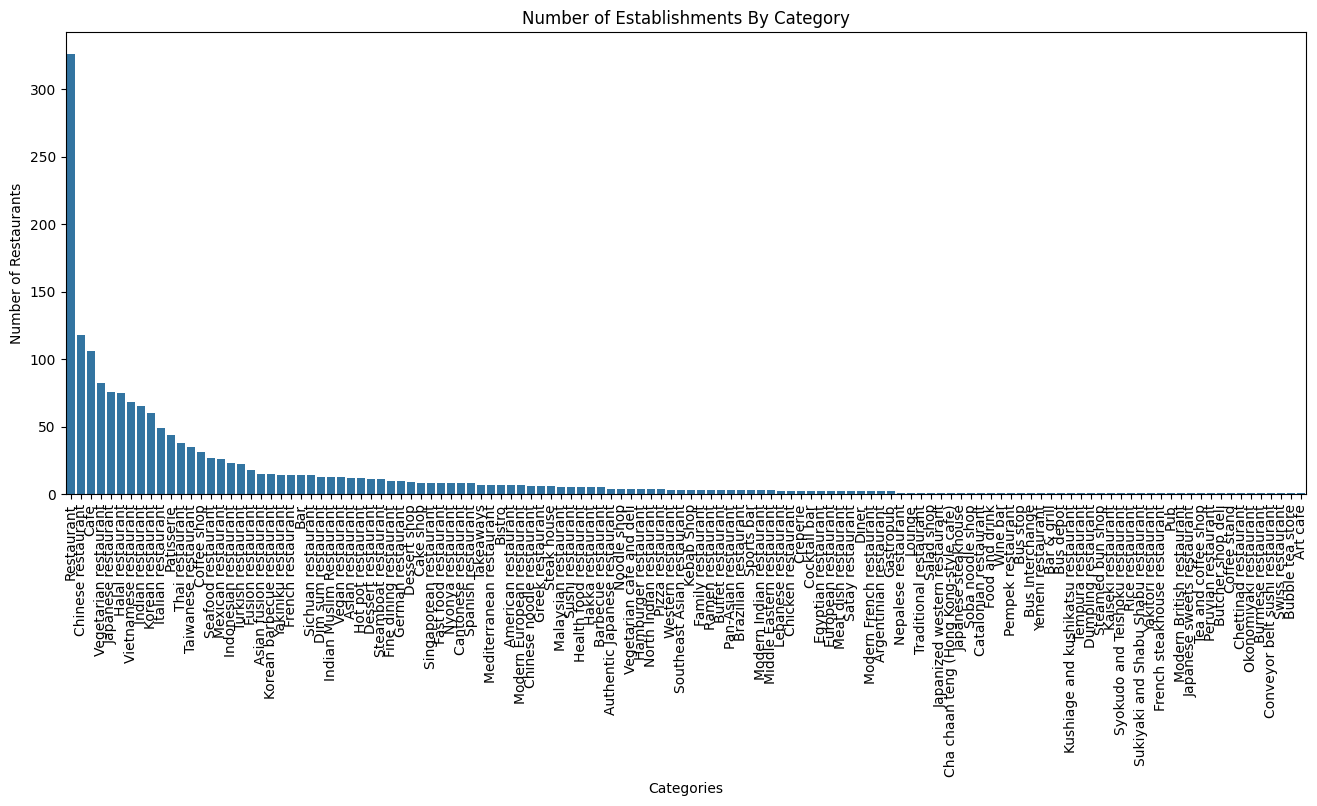

In [60]:
plt.figure(figsize=(16,6)) 
sns.countplot(data=restaurants, x='main_category', order=num_restaurants_by_categories.index)
plt.xticks(rotation=90)
plt.title('Number of Establishments By Category')
plt.xlabel('Categories')
plt.ylabel('Number of Restaurants')
plt.show()

#### 🧑🏻‍🍳🧑🏻‍🍳 We can try just cutting off the minor categories with membership lower than the mean

In [59]:
num_restaurants_by_categories_cut = num_restaurants_by_categories[num_restaurants_by_categories>num_restaurants_by_categories.mean()]
num_restaurants_by_categories_cut

Restaurant                    326
Chinese restaurant            118
Cafe                          106
Vegetarian restaurant          82
Japanese restaurant            76
Halal restaurant               75
Vietnamese restaurant          68
Indian restaurant              65
Korean restaurant              60
Italian restaurant             49
Patisserie                     44
Thai restaurant                38
Taiwanese restaurant           35
Coffee shop                    31
Seafood restaurant             27
Mexican restaurant             26
Indonesian restaurant          23
Turkish restaurant             22
Fusion restaurant              18
Asian fusion restaurant        15
Korean barbecue restaurant     15
Name: main_category, dtype: int64

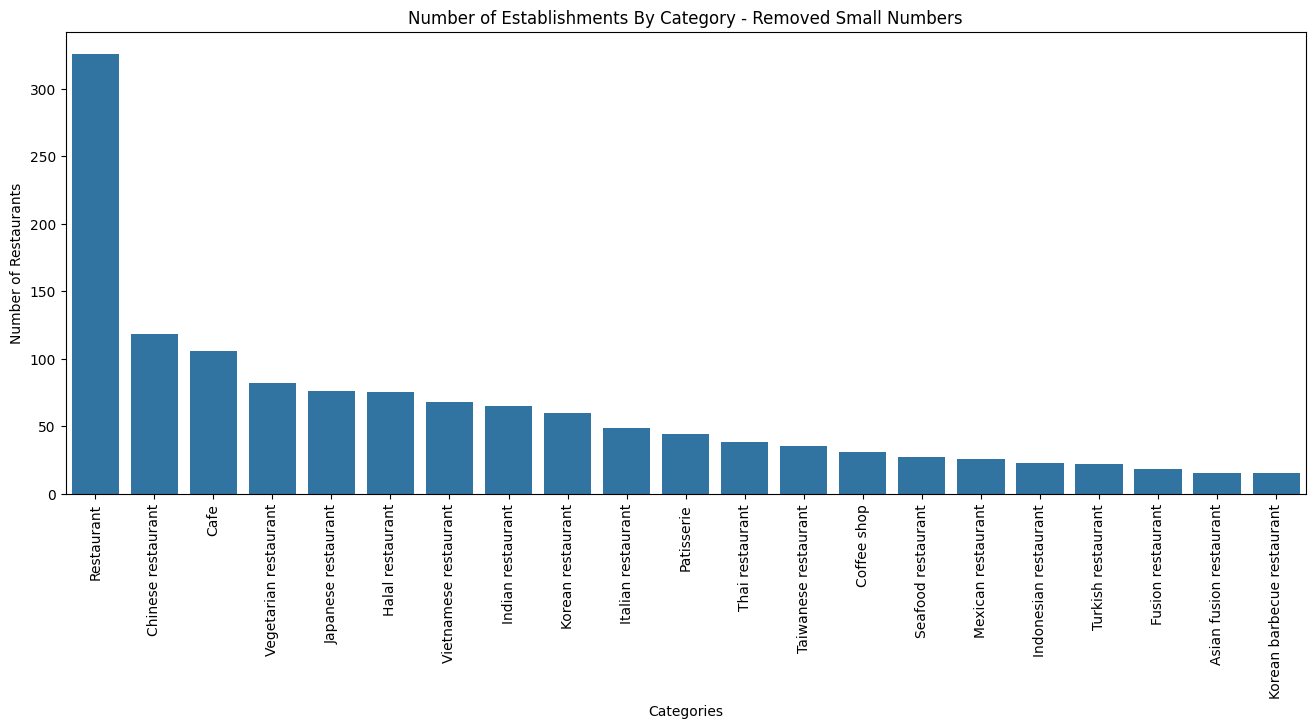

In [61]:
plt.figure(figsize=(16,6)) 
sns.countplot(data=restaurants, x='main_category', order=num_restaurants_by_categories_cut.index)
plt.xticks(rotation=90)
plt.title('Number of Establishments By Category - Removed Small Numbers')
plt.xlabel('Categories')
plt.ylabel('Number of Restaurants')
plt.show()

In [69]:
num_restaurants_by_categories_cut.sum() / num_restaurants_by_categories.sum()

0.7593552101324123

#### 🧑🏻‍🍳🧑🏻‍🍳 But doing this means that we lose about 25% of restaurants. So should we recast the minor categories to major categories? We should analyse what kind of ratings those 25% of restaurants have, if too low then we can drop them? Also, more exact categories should be assigned to restaurants currently categorised as 'restaurants'.

----------------------------------------------------

### Rating & Reviews by Category

In [70]:
restaurants_cut = restaurants[restaurants['main_category'].isin(num_restaurants_by_categories_cut.index)]

In [71]:
mean_ratings_by_category = restaurants_cut.groupby('main_category')['main_rating'].mean().sort_values(ascending=False)
mean_ratings_by_category

main_category
Turkish restaurant            4.568182
Italian restaurant            4.440816
Mexican restaurant            4.434615
Vietnamese restaurant         4.375000
Korean barbecue restaurant    4.320000
Vegetarian restaurant         4.278049
Indian restaurant             4.213846
Japanese restaurant           4.205263
Cafe                          4.152830
Thai restaurant               4.134211
Seafood restaurant            4.092593
Asian fusion restaurant       4.073333
Taiwanese restaurant          4.068571
Restaurant                    4.034663
Korean restaurant             4.030000
Chinese restaurant            4.003390
Patisserie                    3.993182
Indonesian restaurant         3.969565
Coffee shop                   3.861290
Halal restaurant              3.668000
Fusion restaurant             2.150000
Name: main_rating, dtype: float64

In [72]:
total_reviews_by_category = restaurants_cut.groupby('main_category')['reviews'].sum().sort_values(ascending=False)
total_reviews_by_category

main_category
Restaurant                    140709
Cafe                           71395
Chinese restaurant             54215
Indian restaurant              53678
Halal restaurant               47024
Vegetarian restaurant          43829
Italian restaurant             36586
Turkish restaurant             34689
Mexican restaurant             31622
Vietnamese restaurant          30846
Korean restaurant              30156
Japanese restaurant            28498
Taiwanese restaurant           26996
Seafood restaurant             23337
Thai restaurant                17565
Korean barbecue restaurant      9951
Indonesian restaurant           9619
Asian fusion restaurant         7150
Coffee shop                     5441
Fusion restaurant               5137
Patisserie                      4327
Name: reviews, dtype: int64

#### 🧑🏻‍🍳🧑🏻‍🍳 Cuisines like Turkish, Italian, Mexican, Vietnamese, Korean BBQ have the highest mean ratings, though they may not have the most reviews

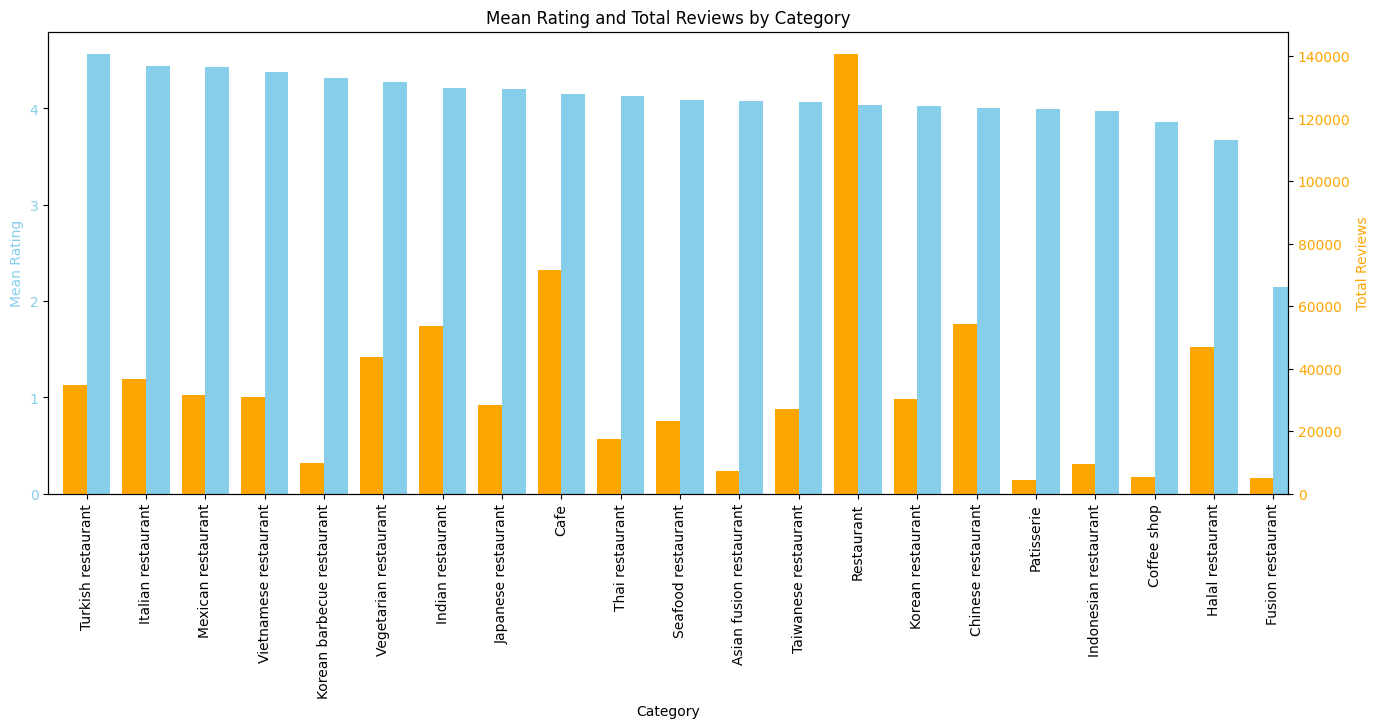

In [74]:
fig, ax1 = plt.subplots(figsize=(16, 6))
mean_ratings_by_category.plot(kind='bar', ax=ax1, color='skyblue', position=0, width=0.4)
ax1.set_xlabel('Category')
ax1.set_ylabel('Mean Rating', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Mean Rating and Total Reviews by Category')
ax1.set_xticklabels(mean_ratings_by_category.index, rotation=90)

ax2 = ax1.twinx()
total_reviews_by_category.reindex(mean_ratings_by_category.index).plot(kind='bar', ax=ax2, color='orange', position=1, width=0.4)
ax2.set_ylabel('Total Reviews', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.show()

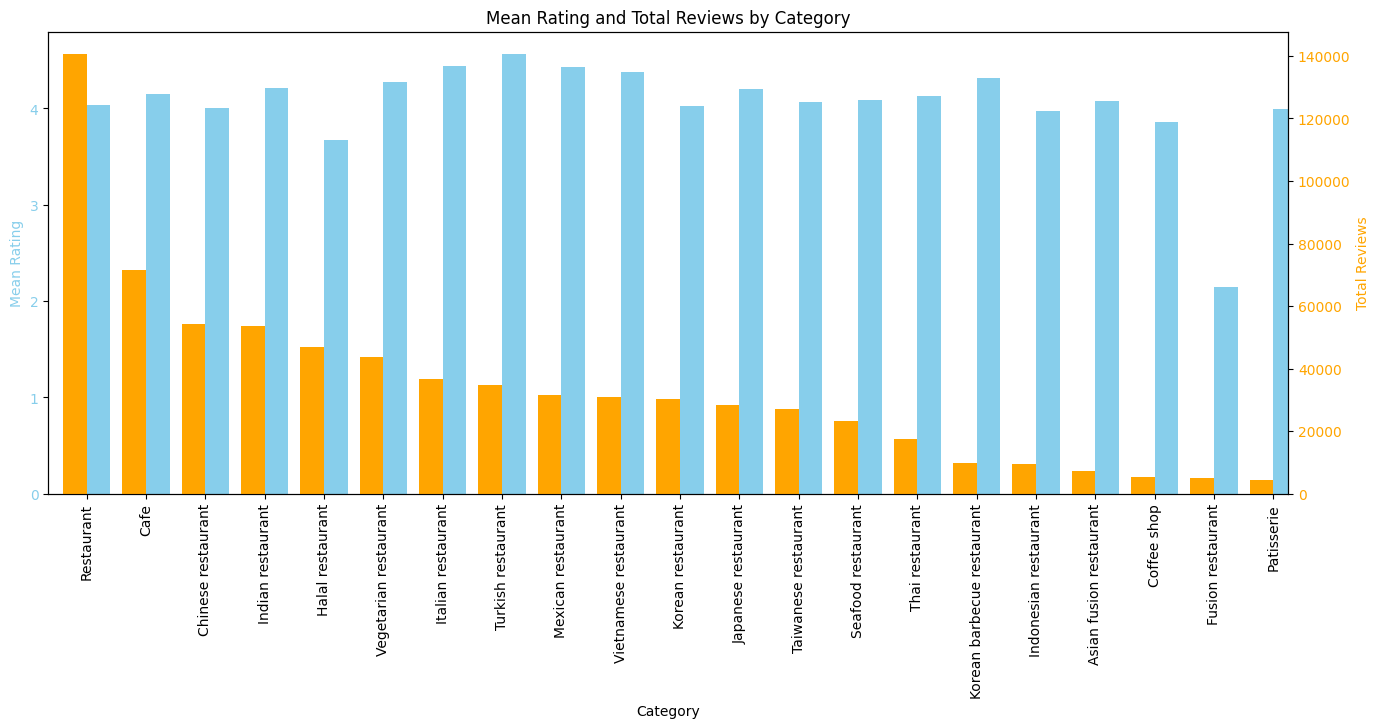

In [73]:
sorted_index = total_reviews_by_category.sort_values(ascending=False).index
mean_ratings_sorted = mean_ratings_by_category.reindex(sorted_index)
total_reviews_sorted = total_reviews_by_category.reindex(sorted_index)

fig, ax1 = plt.subplots(figsize=(16, 6))
mean_ratings_sorted.plot(kind='bar', ax=ax1, color='skyblue', position=0, width=0.4)
ax1.set_xlabel('Category')
ax1.set_ylabel('Mean Rating', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Mean Rating and Total Reviews by Category')
ax1.set_xticklabels(mean_ratings_sorted.index, rotation=90)

ax2 = ax1.twinx()
total_reviews_sorted.plot(kind='bar', ax=ax2, color='orange', position=1, width=0.4)
ax2.set_ylabel('Total Reviews', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.show()